# <center>Pembelajaran Mesin</center>
## <center>Tugas 5 - Logistic Regression </center>

Nama &nbsp;: Ahmad Ali Masykur </br>
NIM &emsp;: 20/462176/PA/20148 </br>
Kelas &ensp;: KOMB 

# Read data

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [11]:
# from google.colab import files
# file = files.upload()

### Ambil data setosa dan virginica dan beri label

In [12]:
iris = pd.read_csv("./iris.csv")
setosa = iris[iris.species == 'setosa'][["sepal_length", "petal_length"]]
setosa[""] = 0
versicolor = iris[iris.species == 'versicolor'][["sepal_length", "petal_length"]]
versicolor[""] = 1
data = pd.concat([setosa, versicolor])

print("Data : \n", data)

Data : 
     sepal_length  petal_length   
0            5.1           1.4  0
1            4.9           1.4  0
2            4.7           1.3  0
3            4.6           1.5  0
4            5.0           1.4  0
..           ...           ... ..
95           5.7           4.2  1
96           5.7           4.2  1
97           6.2           4.3  1
98           5.1           3.0  1
99           5.7           4.1  1

[100 rows x 3 columns]


In [13]:
# x = feature values, semua kolom kecuali kolom terakhir
xdata = data.iloc[:, :-1]
print(xdata)

# y = feature values, kolom terakhir
ydata = data.iloc[:, -1]
print(ydata)

    sepal_length  petal_length
0            5.1           1.4
1            4.9           1.4
2            4.7           1.3
3            4.6           1.5
4            5.0           1.4
..           ...           ...
95           5.7           4.2
96           5.7           4.2
97           6.2           4.3
98           5.1           3.0
99           5.7           4.1

[100 rows x 2 columns]
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: , Length: 100, dtype: int64


# Split data
### Split data menjadi data training dan test dengan perbandingan 80:20

In [14]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2)

print("x train :\n", x_train)
print("x test :\n", x_test)
print("y train :\n", y_train)
print("y test :\n", y_test)

x train :
     sepal_length  petal_length
83           6.0           5.1
6            4.6           1.4
79           5.7           3.5
24           4.8           1.9
9            4.9           1.5
..           ...           ...
19           5.1           1.5
35           5.0           1.2
78           6.0           4.5
42           4.4           1.3
48           5.3           1.5

[80 rows x 2 columns]
x test :
     sepal_length  petal_length
63           6.1           4.7
70           5.9           4.8
5            5.4           1.7
87           6.3           4.4
75           6.6           4.4
1            4.9           1.4
32           5.2           1.5
69           5.6           3.9
38           4.4           1.3
94           5.6           4.2
26           5.0           1.6
50           7.0           4.7
13           4.3           1.1
47           4.6           1.4
58           6.6           4.6
29           4.7           1.6
64           5.6           3.6
49           5.0          

## Visualize data

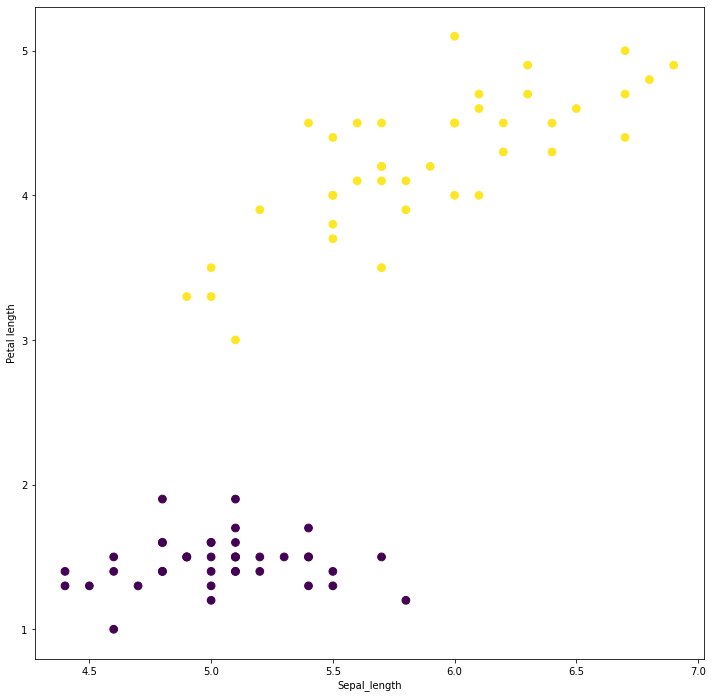

In [15]:
plt.figure(figsize=(12, 12))
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train.ravel(), s=60)
plt.xlabel("Sepal_length")
plt.ylabel("Petal length")
plt.show()

# Define Function

In [16]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, iter=100):
        self.learning_rate = learning_rate
        self.iter = iter
    
    #initialize
    def initialize(self, x_):
        theta = np.zeros((np.shape(x_)[1] + 1))
        x = np.concatenate((np.ones((np.shape(x_)[0], 1)), x_), axis=1)
        return theta, x
    
    # sigmoid function
    def sigmoid(self, z_):
        sig = 1 / (1 + np.exp(-z_))
        return sig

    #calculate h
    def calc_h(self, x_, theta):
        z = np.dot(x_, theta)
        h = self.sigmoid(z)
        return h    

    # Cost function
    def cost(self, x_:pd.DataFrame, y_:pd.DataFrame, theta):
        h = self.calc_h(x_, theta)
        cost0 = y_ * np.log(h)
        cost1 = (1 - y_) * np.log(1 - h)
        total_cost = -((cost1 + cost0)).mean()
        return total_cost
    
    # Gradient Descent algorithm 
    def gradient(self, x_:pd.DataFrame, y_:pd.DataFrame, theta):
        h = self.calc_h(x_, theta)
        m = y_.size
        gradient = np.dot(x_.T, (h - y_)) / m
        return gradient
    
    # Training data      
    def fit(self, x_, y_):
        theta, x = self.initialize(x_)
        
        cost_list = np.zeros((self.iter),)
        for i in range(self.iter):
            gradient = self.gradient(x, y_, theta)
            theta = theta - self.learning_rate * gradient
            cost_list[i] = self.cost(x, y_, theta)
            
        self.theta = theta
        return cost_list
    
    def predict(self, x_):
        z = np.dot(x_, self.theta)
        h = self.sigmoid(z)

In [17]:
def F1_score(y, y_hat):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

# Train Data

In [18]:
logreg = LogisticRegression(learning_rate=0.001, iter=100)
theta, x = logreg.initialize(x_train)
y_train = y_train.T
h = logreg.calc_h(x, theta)

print(x)
print(theta)
print(h)
print(y_train)

[[1.  6.  5.1]
 [1.  4.6 1.4]
 [1.  5.7 3.5]
 [1.  4.8 1.9]
 [1.  4.9 1.5]
 [1.  6.1 4.7]
 [1.  5.  1.6]
 [1.  6.  4. ]
 [1.  5.7 4.2]
 [1.  4.6 1. ]
 [1.  5.5 1.4]
 [1.  4.8 1.4]
 [1.  5.4 1.7]
 [1.  5.  3.5]
 [1.  5.7 4.1]
 [1.  5.1 1.5]
 [1.  6.9 4.9]
 [1.  5.  1.3]
 [1.  6.1 4.6]
 [1.  4.4 1.4]
 [1.  5.5 4. ]
 [1.  5.  1.5]
 [1.  5.1 3. ]
 [1.  5.4 4.5]
 [1.  5.5 4. ]
 [1.  5.5 3.8]
 [1.  5.  1.4]
 [1.  6.5 4.6]
 [1.  5.4 1.5]
 [1.  6.2 4.5]
 [1.  4.9 3.3]
 [1.  5.  3.3]
 [1.  5.5 4.4]
 [1.  5.1 1.7]
 [1.  5.6 4.5]
 [1.  6.4 4.3]
 [1.  5.  1.6]
 [1.  6.7 5. ]
 [1.  4.7 1.3]
 [1.  5.9 4.2]
 [1.  5.7 1.5]
 [1.  5.4 1.3]
 [1.  4.9 1.5]
 [1.  6.3 4.7]
 [1.  5.2 1.4]
 [1.  4.8 1.6]
 [1.  5.8 1.2]
 [1.  6.7 4.7]
 [1.  4.9 1.5]
 [1.  5.7 4.5]
 [1.  4.5 1.3]
 [1.  5.1 1.5]
 [1.  4.8 1.6]
 [1.  5.7 4.2]
 [1.  5.1 1.4]
 [1.  6.7 4.4]
 [1.  5.2 3.9]
 [1.  5.5 1.3]
 [1.  5.1 1.6]
 [1.  6.3 4.9]
 [1.  5.5 3.7]
 [1.  5.4 1.5]
 [1.  5.2 1.5]
 [1.  6.2 4.3]
 [1.  6.4 4.5]
 [1.  5.1 1.4]
 [1.  5.8 

In [19]:
cost_list = logreg.fit(x_train, y_train)
cost_list

array([0.6926188 , 0.69209597, 0.6915786 , 0.69106657, 0.69055978,
       0.69005813, 0.68956152, 0.68906985, 0.68858302, 0.68810094,
       0.68762351, 0.68715066, 0.68668228, 0.68621828, 0.6857586 ,
       0.68530313, 0.6848518 , 0.68440453, 0.68396124, 0.68352185,
       0.68308629, 0.68265447, 0.68222634, 0.68180182, 0.68138083,
       0.68096331, 0.6805492 , 0.68013842, 0.67973091, 0.67932661,
       0.67892546, 0.6785274 , 0.67813236, 0.67774029, 0.67735114,
       0.67696484, 0.67658134, 0.67620059, 0.67582253, 0.67544712,
       0.6750743 , 0.67470402, 0.67433624, 0.67397091, 0.67360797,
       0.6732474 , 0.67288913, 0.67253313, 0.67217935, 0.67182776,
       0.6714783 , 0.67113095, 0.67078566, 0.67044238, 0.6701011 ,
       0.66976176, 0.66942433, 0.66908877, 0.66875505, 0.66842314,
       0.668093  , 0.6677646 , 0.66743791, 0.66711289, 0.66678951,
       0.66646775, 0.66614757, 0.66582895, 0.66551185, 0.66519625,
       0.66488212, 0.66456943, 0.66425816, 0.66394829, 0.66363

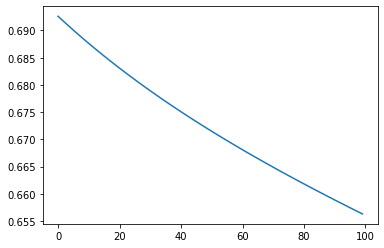

In [20]:
plt.plot(range(100), cost_list)

# Plot Decision boundary

(0.5, 5.6)

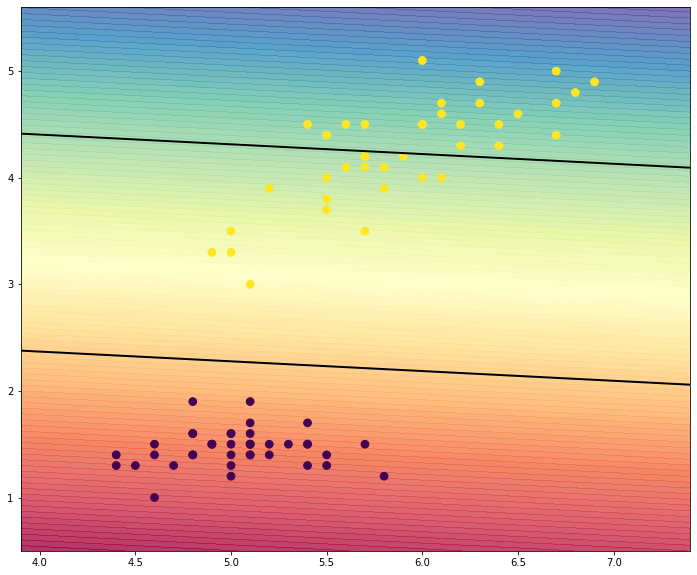

In [31]:
plt.figure(figsize=(12, 10))

# define 2d grid
x1_min, x1_max = x_train.iloc[:, 0].min() - 0.5, x_train.iloc[:, 0].max() + 0.5,
x2_min, x2_max = x_train.iloc[:, 1].min() - 0.5, x_train.iloc[:, 1].max() + 0.5,
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                       np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions on the grid
theta, grid = logreg.initialize(grid)
probs = logreg.calc_h(grid, logreg.theta)
probs = probs.reshape(xx1.shape)

# plot contours
ax = plt.gca()
plt.contourf(xx1, xx2, probs, levels=1000, cmap=plt.cm.Spectral, alpha=0.8)
plt.contour(xx1, xx2, probs, level=1, linewidths=2, colors='black')  # decision boundary at 0.5
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train.ravel(), s=60)
plt.plot(-0.8, 0.8, 'bx', markersize=20, markeredgewidth=2)

ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])

# Testing data

In [24]:
probs.mean()

0.5521985637528248